<a href="https://colab.research.google.com/github/matteo9903/FCC/blob/main/Huggingface%20Platform%20and%20its%20API/Text_to_Image_generation_with_LLM_with_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text-to-Image Generation using Stable Diffusion and Diffusers



vengono utilizzati **diffuser models**


*   sono modelli multimodali (elaborano testo e generano immagini di conseguenza)
*   hanno dunque un'architettura ibrida



In [1]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers accelerate

# installo "diffusers" per usare modelli diffusers da hugging face

In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [3]:
!pip show torch
# per vedere versione del pacchetto

Name: torch
Version: 2.5.1+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [4]:
# ho 2 modelli di diffusione open source di HF
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

# utilizzo pipeline apposita per modelli diffusi
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")  # associo pipeline a GPU

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
# prompt per generazione immagini
prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
"""

In [8]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

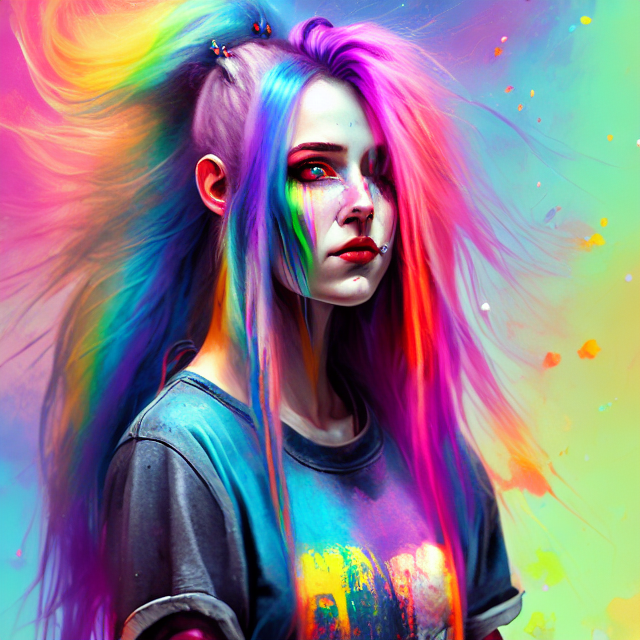

In [9]:
# ottimo risultato, anche comparato a modelli molto più potenti sulla carta
image

[PROMPT]:  dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans



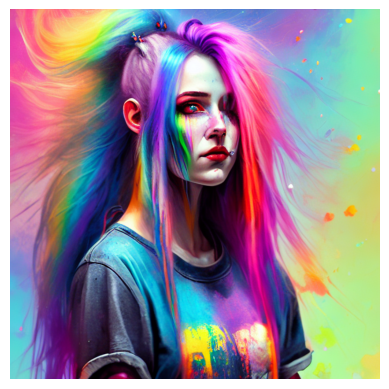

In [10]:
# STAMPO CON MATPLOTLIB
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [16]:
prompt2 = """A girl is sitting on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
"""

image = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A girl is sitting on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris



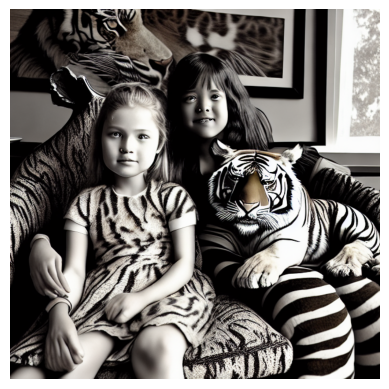

In [17]:
# qua potrebbe farlo meglio, ma ci sta dovuto alla leggerezza del modello
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');

**GUIDA DIFFUSERS**  https://huggingface.co/docs/diffusers/using-diffusers/loading

### Working with Stable Diffusion parameters

* Negative prompting
* num_inference_steps
* height
* weight
* num_images_per_prompt

In [19]:
# FUNZIONE PER GENERARE IMMAGINE NOTI pipeline, prompt e parametri
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

In [20]:
prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional Indian attire, throwing colors"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

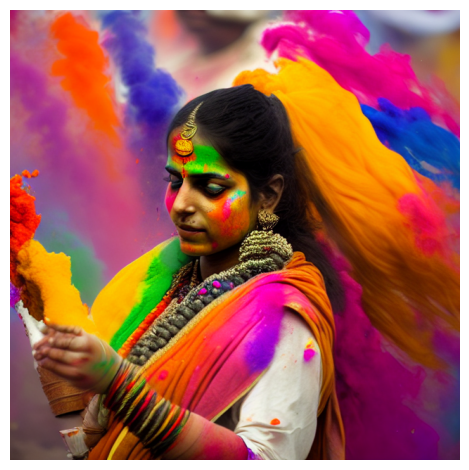

In [21]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

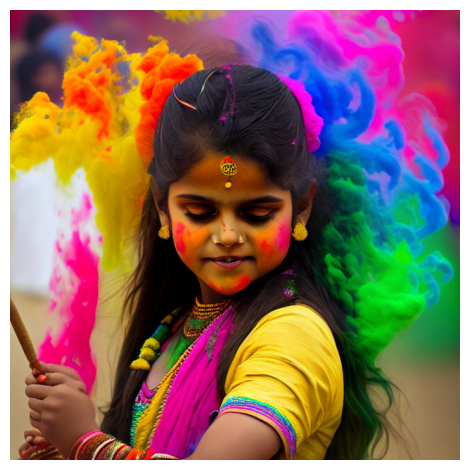

In [22]:
# NUM INFERENCE STEPS
# cambio numero di epoche per la generazione dell'immagine
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

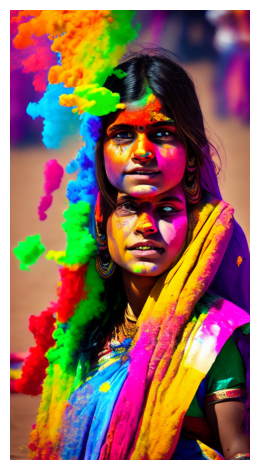

In [23]:
# HEIGHT AND WEIGHT
# cambio dimensioni dell'immagine
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

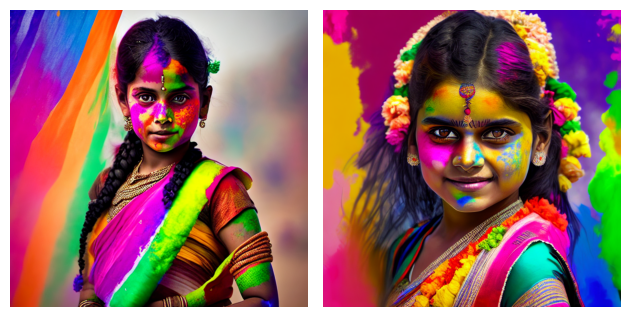

In [24]:
# NUM IMAGES PER PROMPT
# posso far generare più immagini contemporaneamente
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

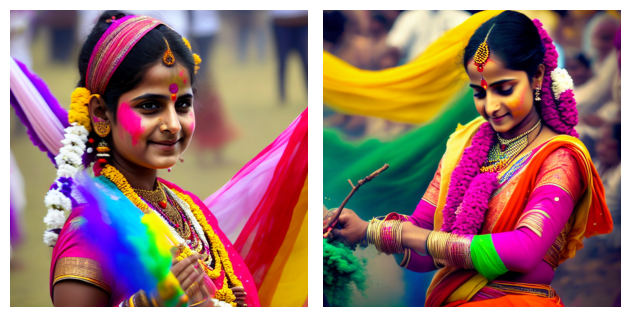

In [25]:
# NEGATIVE_PROMPT
# posso aggiungere prompt negativi gli elementi indesiderati
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)

Modelli diffusione hanno **due categorie di prompt**:


*  ***positivi***: definiscono l'output desiderato
*   ***negativi***: descrivono elementi indesidera

